In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [3]:
#Generate a list of cites
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

      # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

 # Print the city count to confirm sufficient count
print(cities)       



['saskylakh', 'amderma', 'hilo', 'cape town', 'atasu', 'bluff', 'bredasdorp', 'vaini', 'grahamstown', 'vila velha', 'katsuura', 'khatanga', 'pisco', 'cabo san lucas', 'albany', 'mataura', 'isangel', 'barrow', 'dikson', 'namatanai', 'ribeira grande', 'beatrice', 'punta arenas', 'nizhneyansk', 'taywarah', 'avarua', 'sivaki', 'busselton', 'puerto ayora', 'brockville', 'kulhudhuffushi', 'provideniya', 'ushuaia', 'iqaluit', 'dwarka', 'aklavik', 'bonfim', 'yellowknife', 'los llanos de aridane', 'taolanaro', 'victoria', 'iwaki', 'sugag', 'bambous virieux', 'mount gambier', 'rikitea', 'hermanus', 'coquimbo', 'nyurba', 'mizdah', 'mys shmidta', 'jamestown', 'bani walid', 'tuktoyaktuk', 'rio gallegos', 'yaan', 'hithadhoo', 'port alfred', 'ancud', 'la rioja', 'piacabucu', 'pevek', 'butaritari', 'port elizabeth', 'goias', 'nome', 'narimanov', 'shiraoi', 'castro', 'chuy', 'laguna', 'voh', 'kruisfontein', 'talnakh', 'kaitangata', 'okhotsk', 'kapaa', 'faanui', 'ponta do sol', 'kazalinsk', 'nikolskoye'

In [4]:
# base url for API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
record = 0
sets = 1
#creating empty list to store data

city_id = []
city_name = []
country_list = []
lng = []
lat = []
max_temp = []
humidity = []
wind_speed = []
cloud = []
date_list = []


#loop through cites and use except to handle erros

count = 0
for city in cities:
     response_json = requests.get(query_url + city).json()
     #print(response_json)
     try:
          print(f"Processing Record {record} of set {sets} | {city}")
          city_id.append(response_json["sys"]["id"])
          city_name.append(city)
          country_list.append(response_json["sys"]["country"])
          date_list.append(response_json['dt'])   
          lng.append(response_json["coord"]["lon"])
          lat.append(response_json["coord"]["lat"])
          max_temp.append(response_json["main"]["temp_max"])
          humidity.append(response_json["main"]["humidity"])
          cloud.append(response_json["clouds"]["all"])
          wind_speed.append(response_json["wind"]["speed"])
     except:
          print(f"city not found. Skipping {city}.")      

print(f"City Name: {cities}, City ID: {city_id}")
    
   
  

 


    #  try:
    #      city_id = response_json["id"]
    #      city_name = response_json["name"]





sing Record 0 of set 1 | dagua
Processing Record 0 of set 1 | parrita
Processing Record 0 of set 1 | flin flon
Processing Record 0 of set 1 | kushima
Processing Record 0 of set 1 | benton
Processing Record 0 of set 1 | orbetello
Processing Record 0 of set 1 | atka
city not found. Skipping atka.
Processing Record 0 of set 1 | spring valley
Processing Record 0 of set 1 | hambantota
Processing Record 0 of set 1 | mayumba
city not found. Skipping mayumba.
Processing Record 0 of set 1 | mkushi
city not found. Skipping mkushi.
Processing Record 0 of set 1 | bima
city not found. Skipping bima.
Processing Record 0 of set 1 | lasa
Processing Record 0 of set 1 | gao
city not found. Skipping gao.
Processing Record 0 of set 1 | balkhash
city not found. Skipping balkhash.
Processing Record 0 of set 1 | biltine
city not found. Skipping biltine.
Processing Record 0 of set 1 | mazamari
city not found. Skipping mazamari.
Processing Record 0 of set 1 | ambilobe
city not found. Skipping ambilobe.
Process

In [6]:
#converting data into a dataFrame

weather_df = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloud,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,90,US,1616437645,88,19.7297,-155.0900,69.80,6.91
1,cape town,0,ZA,1616437398,73,-33.9258,18.4232,70.00,12.66
2,bluff,85,NZ,1616437646,97,-46.6000,168.3333,53.01,1.99
3,bredasdorp,0,ZA,1616437646,72,-34.5322,20.0403,64.40,12.66
4,vaini,20,TO,1616437646,88,-21.2000,-175.2000,75.20,6.91


In [7]:
weather_df.to_csv("../output_data/cities.csv", index = False)
  

In [8]:
#testing to see if any cities have humidity over 100
humidity_test = weather_df[(weather_df['Humidity'] > 100)].index
humidity_test


Int64Index([], dtype='int64')

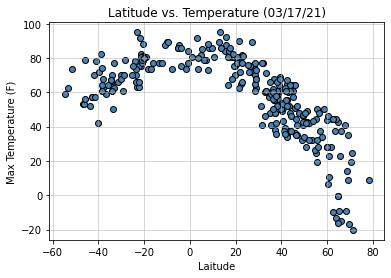

In [9]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Temperature (03/17/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/Latitude vs Max Temperature.png")

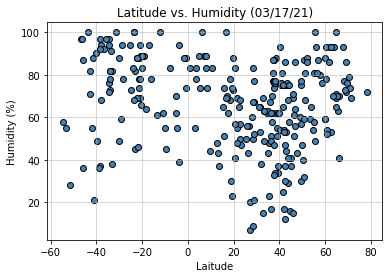

In [10]:
#plot for Latitude vs. Humidity 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Humidity (03/17/21)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output_data/Latitude vs Humidity.png")

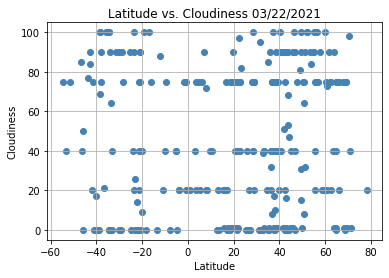

In [11]:
 #Building a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", marker="o")

# This will Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude vs. Cloudiness.png")

# Show plot
plt.show()

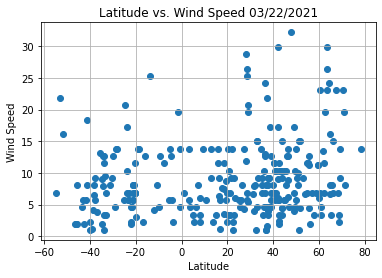

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

In [13]:
#dataframe for hemisphere
mask = weather_df['Lat'] > 0
northern_hemisphere = weather_df[mask]
southern_hemisphere = weather_df[~mask]


In [14]:
#plotting North 
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


NameError: name 'linregress' is not defined

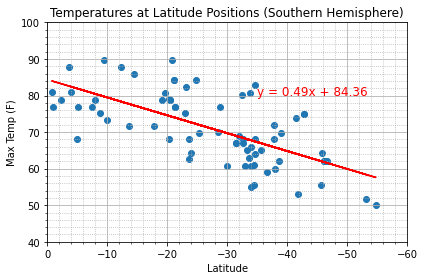

In [243]:
#plotting south
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


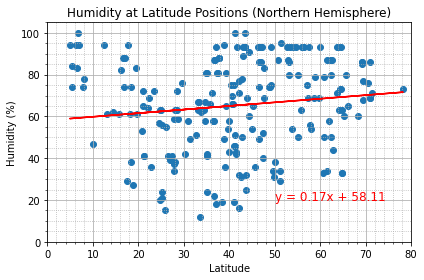

In [244]:
#plot northern humidity
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


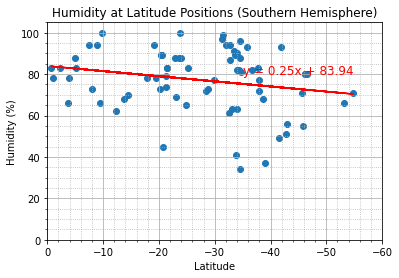

In [245]:
#plotting sourthen humidity 
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()


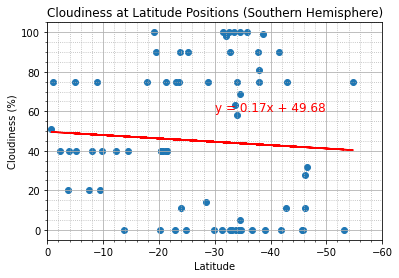

In [246]:
#south clouds plot
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()


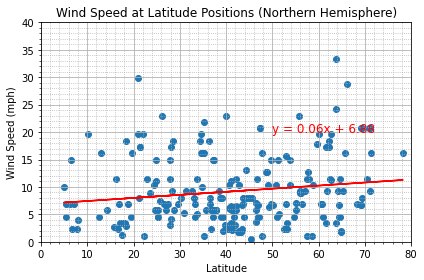

In [247]:
#northern windspeed plot
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()


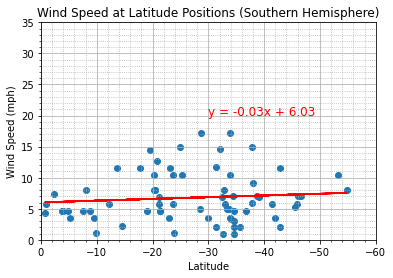

In [248]:
#southern wind speed plot
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
